**Tried solving regression task with three methods: **bold text**
1. **Linear regresion**
2. **MLP Regressor Sklearn**
3. **Autokeras Regression**

In [2]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression


**Reading data**

In [4]:
##Reading data using pandas
data_frame = pd.read_parquet(r'/content/sample_data/data.parquet')
##Removing NaN values
data_frame = data_frame.dropna()
##printing data
data_frame.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,y
0.0,-2.509198,-6.589518,6.574750,1.225544,-5.441297,-5.158895,6.344444,4.929828,9.272400,5.915853,-7.994212
0.1,-1.808076,-5.784906,7.091301,1.977199,-4.726164,-4.434952,6.909614,5.864192,10.527455,6.512394,-20.191479
0.2,-1.107714,-4.981646,7.607356,2.728112,-4.012037,-3.711820,7.474196,6.797094,11.781020,7.108557,19593.971202
0.3,-0.408874,-4.181087,8.122422,3.477542,-3.299921,-2.990308,8.037604,7.727074,13.031605,7.703966,-44.536840
0.4,0.287688,-3.384572,8.636006,4.224751,-2.590815,-2.271221,8.599253,8.652678,14.277727,8.298245,-56.660408


In [5]:
y = data_frame['y']

del data_frame['y']

X = data_frame

**Data scaling using standardization method**

In [6]:
def type_normalization(normalization=True, standarization= False,  data_frame = data_frame):
    if normalization:
        print('+++++++++   Normalization  +++++++++++')
        min_max_scaler = MinMaxScaler()
        normalized_data_non_anomolus = min_max_scaler.fit_transform(data_frame)
        return normalized_data_non_anomolus
    
    elif standarization:
        scaler = StandardScaler()
        print('+++++++++   Standarization  +++++++++++')
        normalized_data_non_anomolus = scaler.fit_transform(data_frame)
        return normalized_data_non_anomolus

In [7]:
normalized_data = type_normalization(normalization=False, standarization= True, data_frame=data_frame)

+++++++++   Standarization  +++++++++++


**Splitting data in train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y,random_state=1)


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

#import autokeras as ak

**1) Linear regression**

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

prediction_frame = reg.predict(X_test)

**Plot test data**

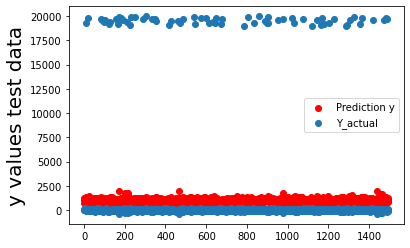

In [21]:

plt.scatter(list(range(y_test.shape[0])),prediction_frame, color = 'red', label = "Prediction y")

plt.scatter(list(range(y_test.shape[0])),y_test, label= "Y_actual")

plt.ylabel("y values test data", fontsize = 20)
plt.legend()
plt.show()

**Plot train data**

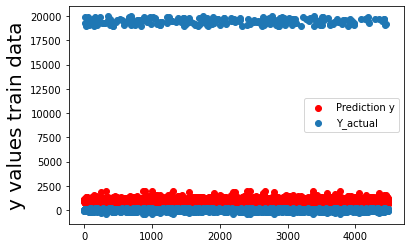

In [22]:
prediction_frame = reg.predict(X_train)

plt.scatter(list(range(y_train.shape[0])),prediction_frame, color = 'red', label = "Prediction y")

plt.scatter(list(range(y_train.shape[0])),y_train, label= "Y_actual")
plt.ylabel("y values train data", fontsize = 20)
plt.legend()
plt.show()

**2) Sklearn MLP regressor**

In [23]:
regr = MLPRegressor(random_state=1, max_iter=5000,learning_rate_init= 0.01,verbose= True).fit(X_train, y_train)

prediction_frame= regr.predict(X_test)

print(type(prediction_frame))

Iteration 1, loss = 9812506.97109224
Iteration 2, loss = 9798406.87446703
Iteration 3, loss = 9768640.48649801
Iteration 4, loss = 9717960.18845937
Iteration 5, loss = 9649808.45232305
Iteration 6, loss = 9567625.56473061
Iteration 7, loss = 9486715.23849071
Iteration 8, loss = 9411203.13798445
Iteration 9, loss = 9359840.71950423
Iteration 10, loss = 9317980.37192244
Iteration 11, loss = 9295603.58529683
Iteration 12, loss = 9281146.72985435
Iteration 13, loss = 9273305.47746295
Iteration 14, loss = 9267836.23011808
Iteration 15, loss = 9265074.45252282
Iteration 16, loss = 9263315.69016495
Iteration 17, loss = 9261748.49037987
Iteration 18, loss = 9258640.18677128
Iteration 19, loss = 9258784.19883244
Iteration 20, loss = 9256868.42224259
Iteration 21, loss = 9256585.27998705
Iteration 22, loss = 9255126.80034504
Iteration 23, loss = 9254195.36784770
Iteration 24, loss = 9253851.10636276
Iteration 25, loss = 9251433.50667404
Iteration 26, loss = 9251642.34826311
Iteration 27, loss = 

**Plot test data**

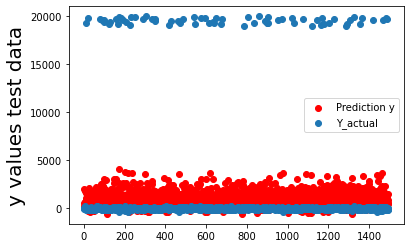

In [24]:



plt.scatter(list(range(y_test.shape[0])),prediction_frame, color = 'red', label = "Prediction y")

plt.scatter(list(range(y_test.shape[0])),y_test, label= "Y_actual")

plt.ylabel("y values test data", fontsize = 20)
plt.legend()
plt.show()

**Plot train data**

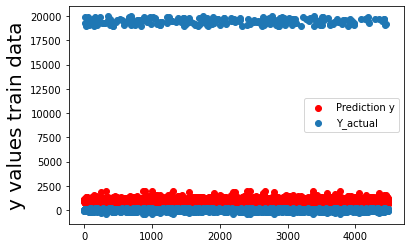

In [25]:
prediction_frame = reg.predict(X_train)

plt.scatter(list(range(y_train.shape[0])),prediction_frame, color = 'red', label = "Prediction y")

plt.scatter(list(range(y_train.shape[0])),y_train, label= "Y_actual")
plt.ylabel("y values train data", fontsize = 20)
plt.legend()
plt.show()

**3) Attempt with Autokeras but could not converge as good as Linear regression or Sklearn MLPregressor**

In [15]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=20, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=500)
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

Trial 20 Complete [00h 00m 08s]
val_loss: 15082966.0

Best val_loss So Far: 14981887.0
Total elapsed time: 00h 09m 46s
Epoch 1/500
141/141 [==============================] - 1s 3ms/step - loss: 19072382.0000 - mean_squared_error: 19072382.0000
Epoch 2/500
141/141 [==============================] - 0s 2ms/step - loss: 18871694.0000 - mean_squared_error: 18871694.0000
Epoch 3/500
141/141 [==============================] - 0s 2ms/step - loss: 18851468.0000 - mean_squared_error: 18851468.0000
Epoch 4/500
141/141 [==============================] - 0s 3ms/step - loss: 18915510.0000 - mean_squared_error: 18915510.0000
Epoch 5/500
141/141 [==============================] - 0s 2ms/step - loss: 18810348.0000 - mean_squared_error: 18810348.0000
Epoch 6/500
141/141 [==============================] - 0s 2ms/step - loss: 18879996.0000 - mean_squared_error: 18879996.0000
Epoch 7/500
141/141 [==============================] - 0s 2ms/step - loss: 18677118.0000 - mean_squared_error: 18677118.0000
Epoch 